In [1]:
#pip install mlflow

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing Libraries
import mlflow.sklearn
   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
#Exporting the dataset
df_churn = pd.read_csv('churn.csv')
df_churn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df_churn.columns.to_series().groupby(df_churn.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [9]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#Checking Null values

df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#Unique values in each categorical variable:

print("For Payment Method\n", df_churn["PaymentMethod"].unique(),'\n')

print("For Contract\n", df_churn["Contract"].unique())


For Payment Method
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

For Contract
 ['Month-to-month' 'One year' 'Two year']


In [12]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'],errors='coerce')
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype("float")

In [13]:
na_cols = df_churn.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in df_churn.columns[1:]:
     if col in na_cols:
        if df_churn[col].dtype != 'object':
             df_churn[col] =  df_churn[col].fillna(df_churn[col].mean()).round(0)

In [14]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values

le_count = 0
for col in df_churn.columns[1:]:
    if df_churn[col].dtype == 'object':
        if len(list(df_churn[col].unique())) <= 2:
            le.fit(df_churn[col])
            df_churn[col] = le.transform(df_churn[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


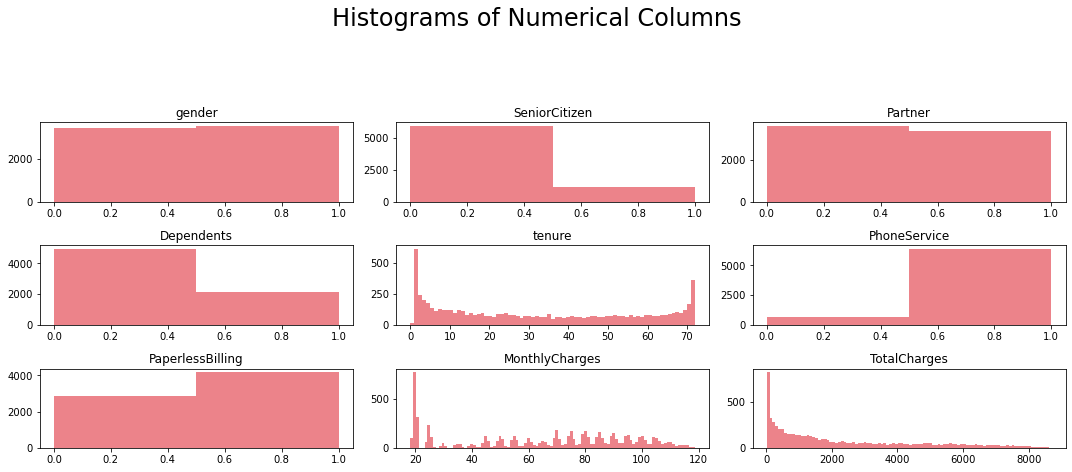

In [15]:
#Plot histogram of numeric Columns:
    
df_churn2 = df_churn[['gender', 
'SeniorCitizen', 'Partner','Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges', 'TotalCharges']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(df_churn2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df_churn2.columns.values[i])
    vals = np.size(df_churn2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df_churn2.iloc[:, i], bins=vals, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

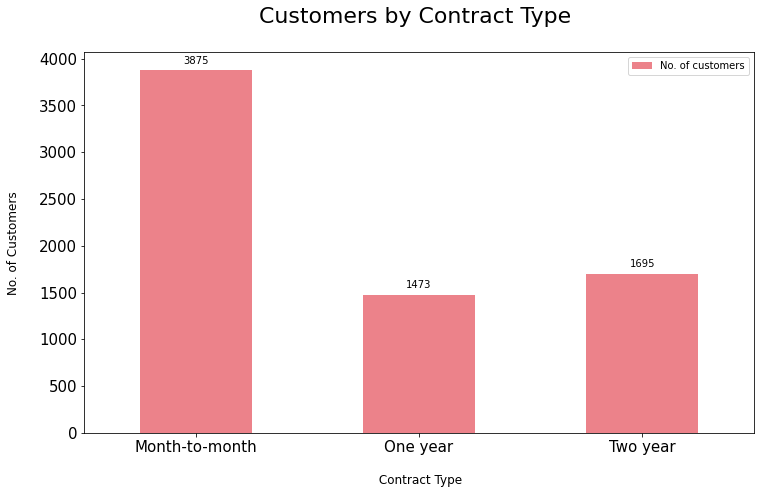

In [16]:
# Distribution of contract type

contract_split = df_churn[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)
ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type',legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec828a', 
fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(contract_split[["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        
        label = "{:.0f}".format(y_value)      
        
        ax.annotate(label,                      
                    (x_value, y_value),         
                    xytext=(0, space),          
                    textcoords="offset points", 
                    ha='center',                
                    va=va)  
        
add_value_labels(ax)

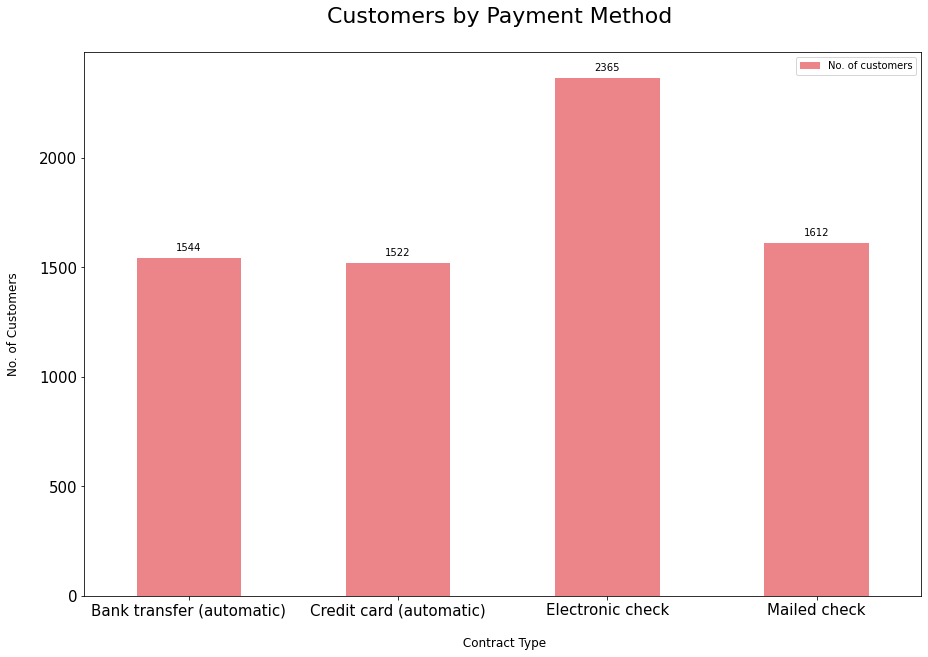

In [17]:
#Distribution of payment method type:

payment_method_split = df_churn[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)
ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False, subplots = False,  figsize =(15, 10),color ='#ec858a', fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(payment_method_split [["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)
     
        ax.annotate(label,
                   (x_value, y_value),         
                    xytext=(0, space),textcoords="offset points", 
                    ha='center',va=va)
add_value_labels(ax)

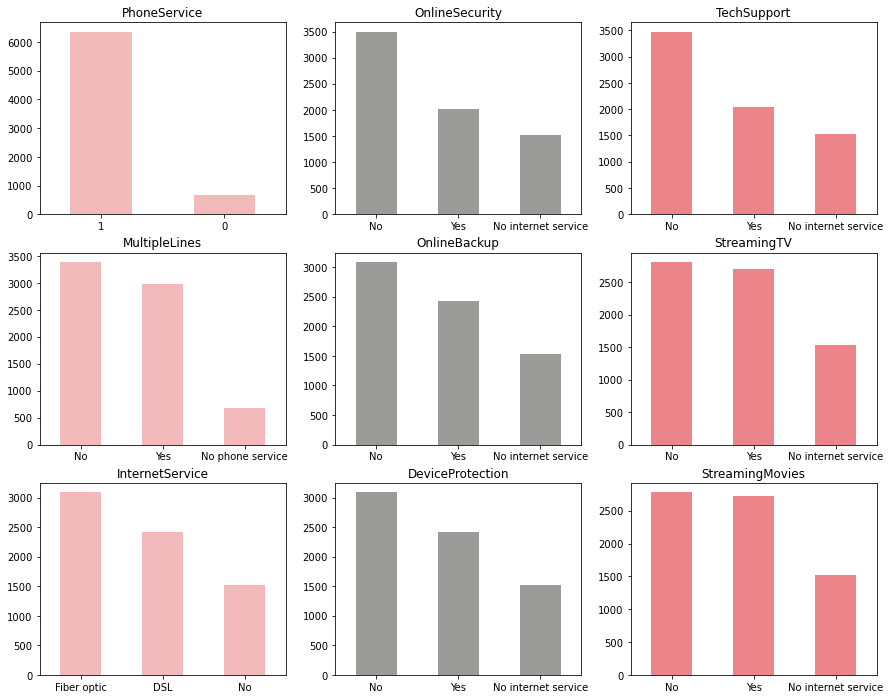

In [18]:
#Distribution of label encoded categorical variables:

services= ['PhoneService','MultipleLines',
'InternetService','OnlineSecurity',  'OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows = 3,ncols = 3,
figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df_churn[item].value_counts().plot(
        kind = 'bar',ax=axes[i,0],
        rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = df_churn[item].value_counts().plot(
        kind = 'bar',ax=axes[i-3,1],
        rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = df_churn[item].value_counts().plot(
        kind = 'bar',ax=axes[i-6,2],rot = 0,
        color = '#ec858a')
    ax.set_title(item)

C:\Users\spoor\AppData\Local\Temp/ipykernel_25320/3322183543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(


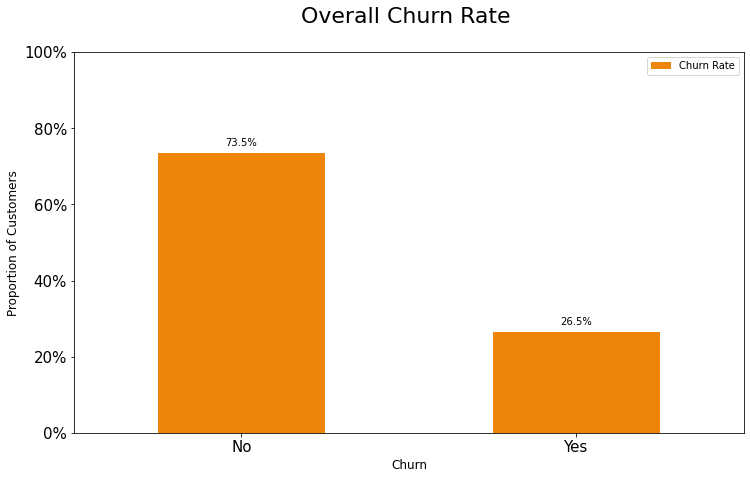

In [19]:
#Overall churn rate:

import matplotlib.ticker as mtick
churn_rate = df_churn[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(
np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (
churn_rate ["customerID"]/ sum(churn_rate ["customerID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), color = '#ec850a', fontsize = 15, stacked=False, 
ylim =(0,100))
plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
 
        ax.annotate(label,
                (x_value, y_value),         
                 xytext=(0, space),
                 textcoords="offset points", 
                 ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

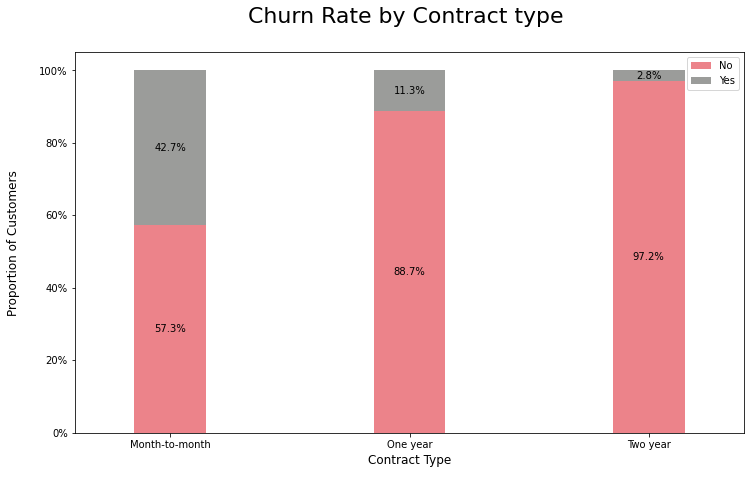

In [20]:
#Churn Rate by Contract Type

import matplotlib.ticker as mtick
contract_churn = df_churn.groupby(['Contract','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

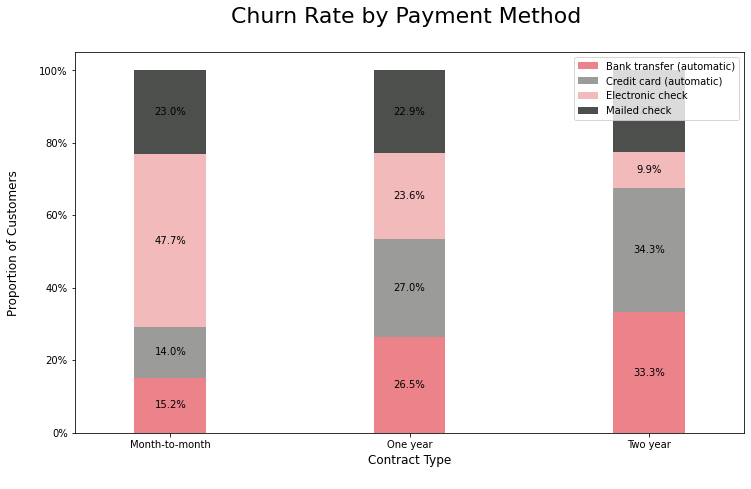

In [21]:
#Churn Rate by Payment Method Type:

import matplotlib.ticker as mtick
contract_churn = df_churn.groupby(['Contract','PaymentMethod']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(
kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),
color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [22]:
df_churn2 = df_churn[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]
correlations = df_churn2.corrwith(df_churn.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 Partner        -0.150448
Dependents     -0.164221
TotalCharges   -0.199426
tenure         -0.352229
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

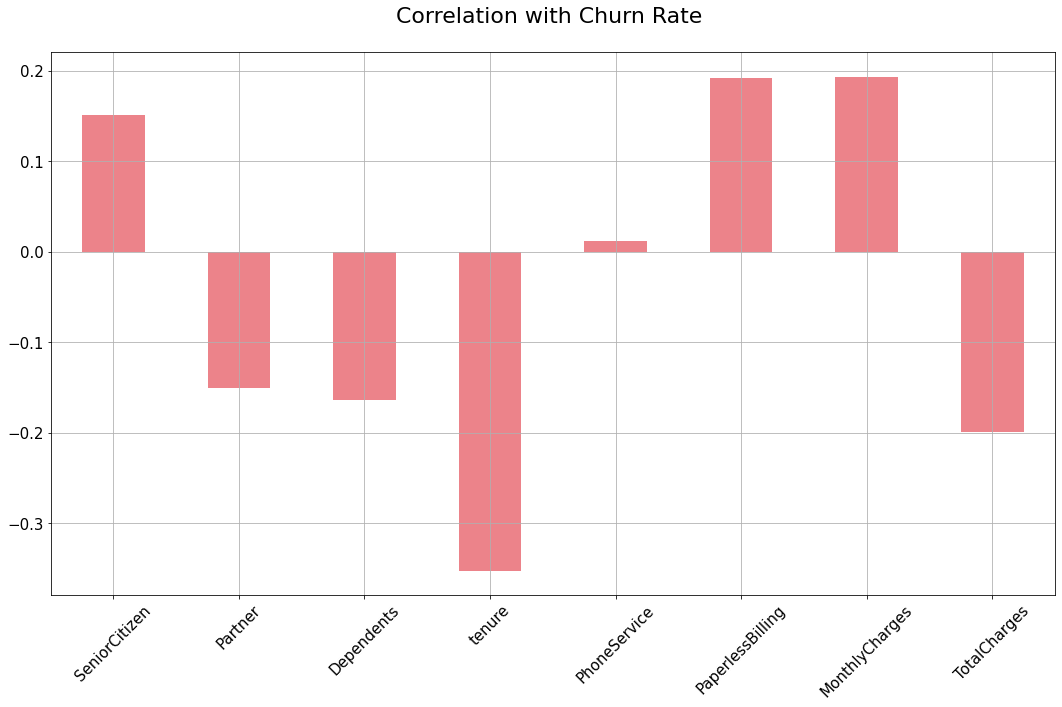

In [23]:
# Plot positive & negative correlations:

correlations = df_churn2.corrwith(df_churn.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

C:\Users\spoor\AppData\Local\Temp/ipykernel_25320/3607191508.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

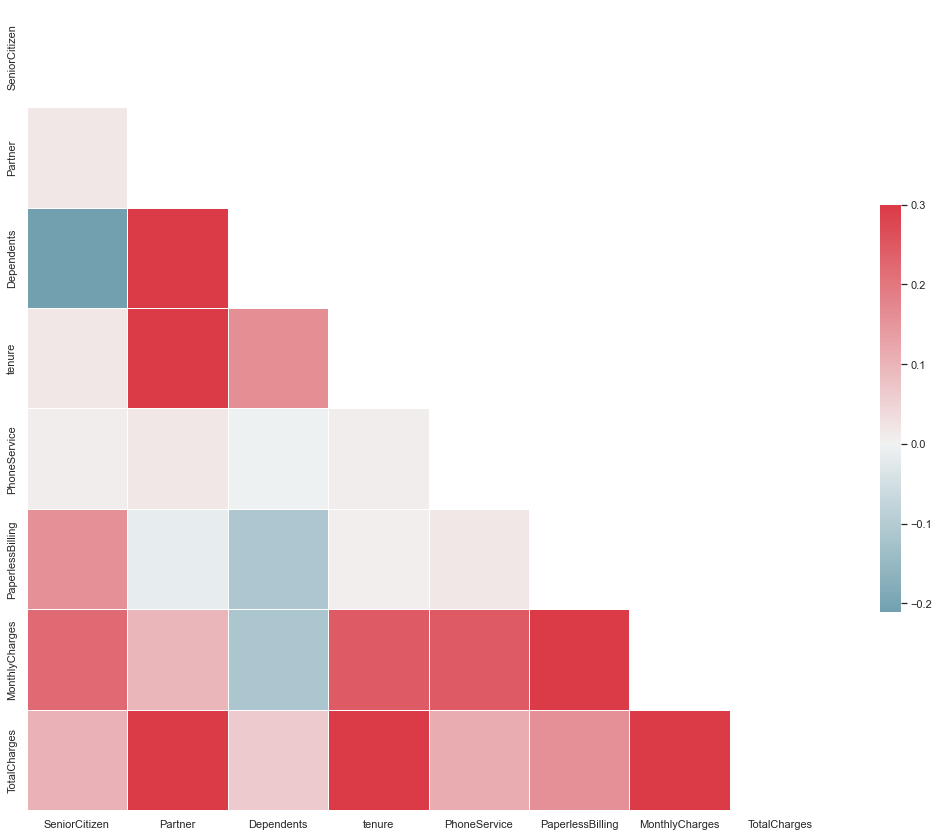

In [24]:
#Plot Correlation Matrix of all independent variables:
#Set and compute the Correlation Matrix:

sn.set(style="white")
corr = df_churn2.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
# Check Multicollinearity using VIF

def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)
df_churn2 = df_churn[['gender', 
'SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService',
'PaperlessBilling','MonthlyCharges',
'TotalCharges']]
calc_vif(df_churn2).sort_values(by=['VIF'], ascending= False)

,variables,VIF
7,MonthlyCharges,13.988649
8,TotalCharges,12.570269
4,tenure,10.549667
5,PhoneService,7.976386
2,Partner,2.815272
6,PaperlessBilling,2.814160
0,gender,1.921286
3,Dependents,1.921208
1,SeniorCitizen,1.327766


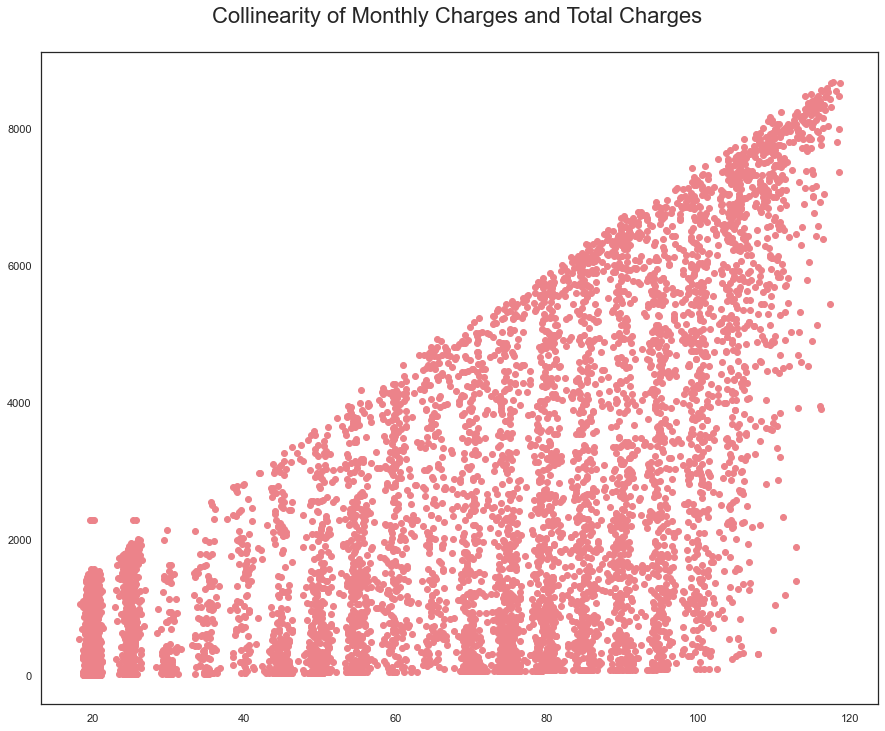

In [26]:
#'Total Charges' seem to be collinear with 'Monthly Charges'.
#Check colinearity:
    
plt.figure(figsize=(15,12))
plt.scatter(
    x='MonthlyCharges',
    y='TotalCharges',
    data=df_churn2[['MonthlyCharges', 'TotalCharges']],
    color='#ec838a')

plt.title('Collinearity of Monthly Charges and Total Charges \n',
          horizontalalignment="center", 
          fontstyle = "normal", 
          fontsize = "22", 
          fontfamily = "sans-serif")
plt.show()

In [27]:
#Dropping 'TotalCharges':
    
df_churn2 = df_churn2.drop(columns = "TotalCharges")
#Revalidate Colinearity:

df_churn2 = df_churn[['gender', 
'SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges']]
calc_vif(df_churn2)


,variables,VIF
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


In [28]:
#Applying changes in the main dataset:
    
df_churn = df_churn.drop(columns = "TotalCharges")

In [29]:
#Encode Categorical data:
#Incase if user_id is an object:
    
identity = df_churn["customerID"]
df_churn = df_churn.drop(columns="customerID")
#Convert rest of categorical variable into dummy:
df_churn= pd.get_dummies(df_churn)
#Rejoin userid to dataset:
df_churn = pd.concat([df_churn, identity], axis = 1)

In [30]:
#Split the dataset into dependent and independent variables:

#Identify response variable:

y = df_churn["Churn"]
X = df_churn.drop(columns="Churn")

In [31]:
#Generate training and test datasets:

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.2, random_state = 0)
#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (5634, 40)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 40)
Number transactions y_test dataset:  (1409,)


In [32]:
#Remove Identifiers
    
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])
test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [33]:
#Conduct Feature Scaling: 

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [34]:
#MLFLOW

# Set mlflow tracking URI to your local mlflow tracking server
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# This API will set the experiment name in MLFLow. If the experiment does't exist then it will create it
mlflow.set_experiment("Sklearn_Telco_Customer_Churn")

<Experiment: artifact_location="'C:\\temp\\mlflow\\localserver'/1", experiment_id='1', lifecycle_stage='active', name='Sklearn_Telco_Customer_Churn', tags={}>

In [35]:
#Model Selection

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
    
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.14,1.53,74.76,1.18
1,SVC,83.65,1.45,80.08,1.20
4,Gaussian NB,81.80,1.76,69.06,1.05
6,Random Forest,81.56,1.61,78.65,1.43
2,Kernel SVM,79.79,1.95,79.87,1.52
3,KNN,76.78,1.97,75.67,1.62
5,Decision Tree Classifier,64.97,1.46,72.20,1.04


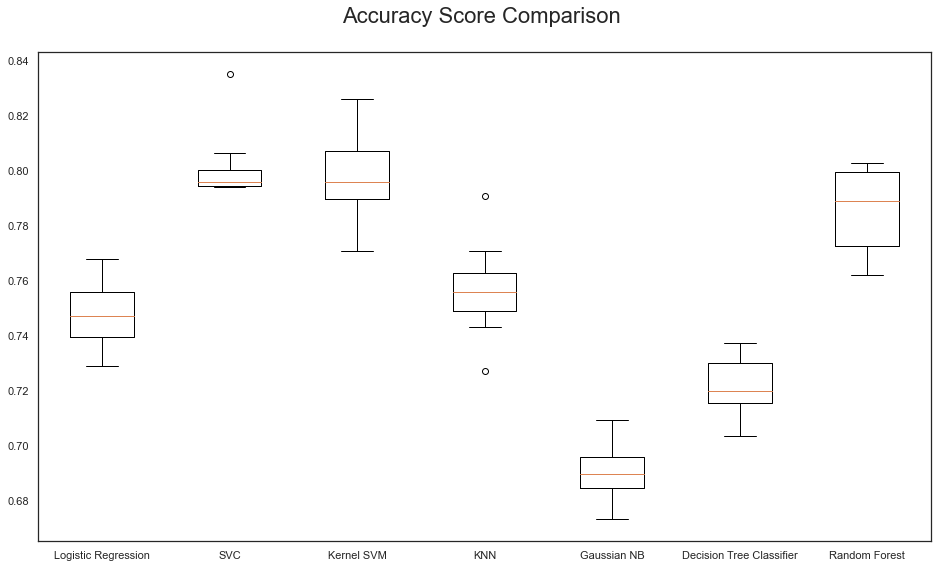

In [36]:
#Visualize Classification Algorithms Accuracy Comparisons:

#Using Accuracy Mean:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names),
plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [37]:
import warnings
warnings.simplefilter('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Result= pd.DataFrame()

for i,n in enumerate(models):
    with mlflow.start_run(run_name=n[0],nested=True) as run:
        pipe = Pipeline([('scaler', StandardScaler()),(n)])
        pipe.fit(X_train, y_train)
        print(n[0])
        print('Predicted Value: ',pipe.predict(X_test))
        Result[n[0]]= pipe.predict(X_test)
        # Log model
        mlflow.sklearn.log_model(n[1], n[0])
        print('Accuracy: ',pipe.score(X_test, y_test),'\n\n')
        # Log metrics
        mlflow.log_metric("Accuracy", pipe.score(X_test, y_test))
        runID = run.info.run_uuid
        experimentID = run.info.experiment_id

2022/04/11 23:41:29 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



Logistic Regression
Predicted Value:  [0 1 1 ... 0 0 1]
Accuracy:  0.7530163236337828 


SVC
Predicted Value:  [0 0 1 ... 0 0 1]
Accuracy:  0.8034066713981547 


Kernel SVM
Predicted Value:  [0 0 1 ... 0 0 1]
Accuracy:  0.7913413768630234 


KNN
Predicted Value:  [0 0 1 ... 0 0 1]
Accuracy:  0.7487579843860894 


Gaussian NB
Predicted Value:  [0 1 1 ... 0 0 1]
Accuracy:  0.7033356990773598 


Decision Tree Classifier
Predicted Value:  [0 0 1 ... 0 1 1]
Accuracy:  0.7395315826827538 


Random Forest
Predicted Value:  [0 0 1 ... 0 0 1]
Accuracy:  0.7764371894960965 




In [38]:
print('\n\n\033[1m------------------Prediction Result Comparison Table-----------------\033[0m')
Result.sort_index(ascending=True)



------------------Prediction Result Comparison Table-----------------


,Logistic Regression,SVC,Kernel SVM,KNN,Gaussian NB,Decision Tree Classifier,Random Forest
0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0
2,1,1,1,1,1,1,1
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1404,0,0,0,0,0,0,0
1405,0,0,0,0,0,0,0
1406,0,0,0,0,0,0,0
1407,0,0,0,0,0,1,0


In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

print('\n\n\033[1m------------------MODEL EVALUATION-----------------\033[0m')

for i,n in enumerate(models):
    with mlflow.start_run(run_name=n[0]) as run:
        mod=n[1].fit(X_train,y_train)
        ypred=mod.predict(X_test)
        print(n[0],' Model')
        print('Accuracy Score: ',accuracy_score(y_test,ypred))
        print('Recall Score: ',recall_score(y_test,ypred))
        print('f1 Score: ',f1_score(y_test,ypred))
        print('Precision Score: ',precision_score(y_test,ypred))
        print('Confusion Matrix: \n',confusion_matrix(y_test,ypred),'\n\n')
        # Log metrics
        mlflow.log_metric("Recall Score", recall_score(y_test,ypred))
        runID = run.info.run_uuid
        experimentID = run.info.experiment_id

        mlflow.log_metric("f1 Score", f1_score(y_test,ypred))
        runID = run.info.run_uuid
        experimentID = run.info.experiment_id

        mlflow.log_metric("Precision Score", precision_score(y_test,ypred))
        runID = run.info.run_uuid
        experimentID = run.info.experiment_id



------------------MODEL EVALUATION-----------------
Logistic Regression  Model
Accuracy Score:  0.7530163236337828
Recall Score:  0.7914438502673797
f1 Score:  0.6297872340425532
Precision Score:  0.5229681978798587
Confusion Matrix: 
 [[765 270]
 [ 78 296]] 


SVC  Model
Accuracy Score:  0.8034066713981547
Recall Score:  0.5614973262032086
f1 Score:  0.6025824964131994
Precision Score:  0.6501547987616099
Confusion Matrix: 
 [[922 113]
 [164 210]] 


Kernel SVM  Model
Accuracy Score:  0.7913413768630234
Recall Score:  0.4946524064171123
f1 Score:  0.5572289156626505
Precision Score:  0.6379310344827587
Confusion Matrix: 
 [[930 105]
 [189 185]] 


KNN  Model
Accuracy Score:  0.7487579843860894
Recall Score:  0.5026737967914439
f1 Score:  0.5150684931506849
Precision Score:  0.5280898876404494
Confusion Matrix: 
 [[867 168]
 [186 188]] 


Gaussian NB  Model
Accuracy Score:  0.7033356990773598
Recall Score:  0.8422459893048129
f1 Score:  0.601145038167939
Precision Score:  0.467359050